In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('water.csv')

In [3]:
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


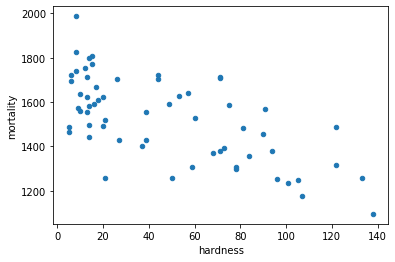

In [9]:
df.plot(kind='scatter', x='hardness', y='mortality')

In [11]:
df[[ 'hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [12]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(df[['hardness']], df['mortality'], test_size=0.20, random_state=42)

In [152]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
model.coef_

array([-3.28281845])

In [154]:
model.intercept_

1683.9212680875548

In [155]:
y_pred = model.predict(X_test)
y_pred

array([1339.22533049, 1651.09308355, 1637.96180974, 1539.47725614,
       1427.86142873, 1618.26489902, 1247.30641379, 1437.70988409,
       1614.98208057, 1664.22435737, 1490.23497934, 1418.01297337,
       1555.89134841])

In [156]:
model.score(X_test, y_test)

0.5099679408034544

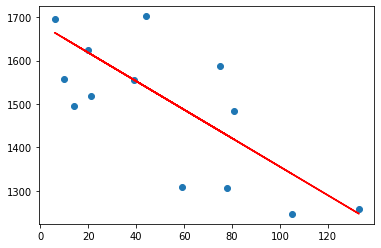

In [157]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Наблюдается обратно пропорциональная взаимосвязь. 

Чем более жесткая вода, тем меньше смертей.

In [64]:
df_South = df.loc[df['location'].isin(['South'])]

In [65]:
df_North = df.loc[df['location'].isin(['North'])]

df_South

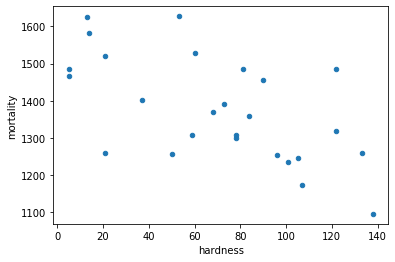

In [68]:
df_South.plot(kind='scatter', x='hardness', y='mortality')

In [69]:
df_South[[ 'hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [70]:
df_South[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [158]:
X_train_South, X_test_South, y_train_South, y_test_South = (
    train_test_split(df_South[['hardness']], df_South['mortality'], test_size=0.20, random_state=42))

In [159]:
model_South = LinearRegression()
model_South.fit(X_train_South, y_train_South)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [160]:
model_South.coef_

array([-3.07466127])

In [161]:
model_South.intercept_

1595.4337548999538

In [162]:
y_pred_South = model_South.predict(X_test_South)
y_pred_South

array([1220.32508018, 1580.06044856, 1272.59432174, 1220.32508018,
       1481.67128798, 1530.86586827])

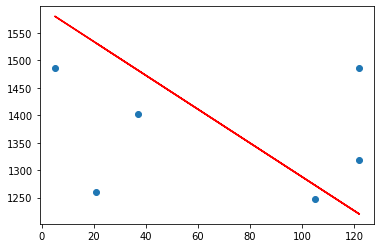

In [163]:
plt.scatter(X_test_South, y_test_South)
plt.plot(X_test_South, y_pred_South, c='r')

Для Севера зависимость практически осталась без изменений. Но остатки вызывают подозрения, т.к. похожи на песочные часы https://prnt.sc/v0iwh7

df_North

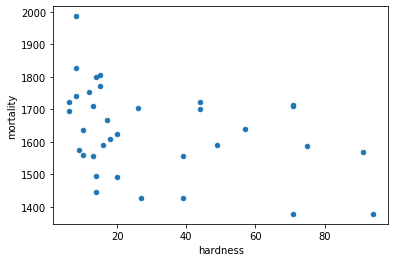

In [93]:
df_North.plot(kind='scatter', x='hardness', y='mortality')

In [94]:
df_North[[ 'hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [95]:
df_North[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [164]:
X_train_North, X_test_North, y_train_North, y_test_North = (
    train_test_split(df_North[['hardness']], df_North['mortality'], test_size=0.20, random_state=42))

In [165]:
model_North = LinearRegression()
model_North.fit(X_train_South, y_train_South)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
model_North.coef_

array([-3.07466127])

In [167]:
model_North.intercept_

1595.4337548999538

In [168]:
y_pred_North = model_North.predict(X_test_North)
y_pred_North

array([1570.83646475, 1567.76180349, 1552.38849715, 1576.98578729,
       1546.23917461, 1377.13280486, 1460.1486591 ])

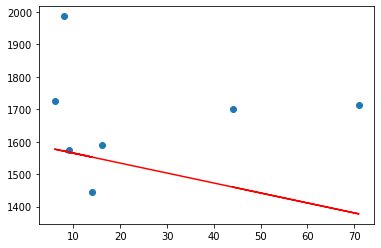

In [169]:
plt.scatter(X_test_North, y_test_North)
plt.plot(X_test_North, y_pred_North, c='r')

Для Южного региона зависимость осталась, но в значительно меньшим влиянием. 

В данном случаем остатки, аналогично вызывают подозрение т.к. практически все находятся сверху от графика. 